# For the whole structure of files please read EDA _2_README_Introduction_1.ipynb
## Graphical exploration for hypotheses 1: The more bedrooms per entity (square meter) of living area, the lower the price of the house
  * Additional variables are created or renamed and some graphical explorations are performed
  

##### Getting data and settings
###### Getting setting stored in 0_definitions.py file

In [12]:
# definitions
with open("0_definitions.py") as file:
    exec(file.read())

##### Getting data stored at the end of EDA _3_cleaning.ipynb

In [ ]:
df_eda = pd.read_csv('eda3.csv',)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)
df_eda.head()

##### Some extra variables for EDA

In [14]:
# Ratio bedrooms	bathrooms 
# 0.092903 square footage = 1 square meters.
# Rescaling for number of bedrooms/bathrooms by 100 squared meter
# Resacling from footage square to meter square
df_eda['bedrooms_for_100sqlivmeter']=(df_eda["bedrooms"]/(df_eda["sqft_living"]*0.092903))*100
df_eda['bathrooms_for_100sqliving'] =(df_eda["bathrooms"]/(df_eda["sqft_living"]*0.092903))*100
# rescaling price for interpretation
df_eda['price'] = df_eda['price'] / 100000



##### Categorial variables for beth and bedrooms

In [15]:
df_eda.head()
df_eda['bathrooms_for_100sqliving'].describe()


count    15413.000000
mean         0.961021
std          0.338458
min          0.000000
25%          0.727292
50%          0.904531
75%          1.139039
max          3.075404
Name: bathrooms_for_100sqliving, dtype: float64

In [ ]:
# Define bins and labels
bins = [0, 0.7, 1.6, 3, float('inf')]
labels = ['Very Low (0-1)', 'Low (1-2)', 'Medium (2-3)', 'High (3+)']
# Apply pd.cut to bin the data
df_eda['bedrooms_100'] = pd.cut(df_eda['bedrooms_for_100sqlivmeter'], bins=bins, labels=labels)
# Display the DataFrame with the new binned column
bins = [0, 0.3, 1,  float('inf')]
labels = ['Very Low (0-0.3)', 'Low (0.3-1)', 'High (1+)']
df_eda['bathrooms_100'] = pd.cut(df_eda['bathrooms_for_100sqliving'], bins=bins, labels=labels)
df_eda.head()

##### Price destribution by bathrooms per 100 sqm  

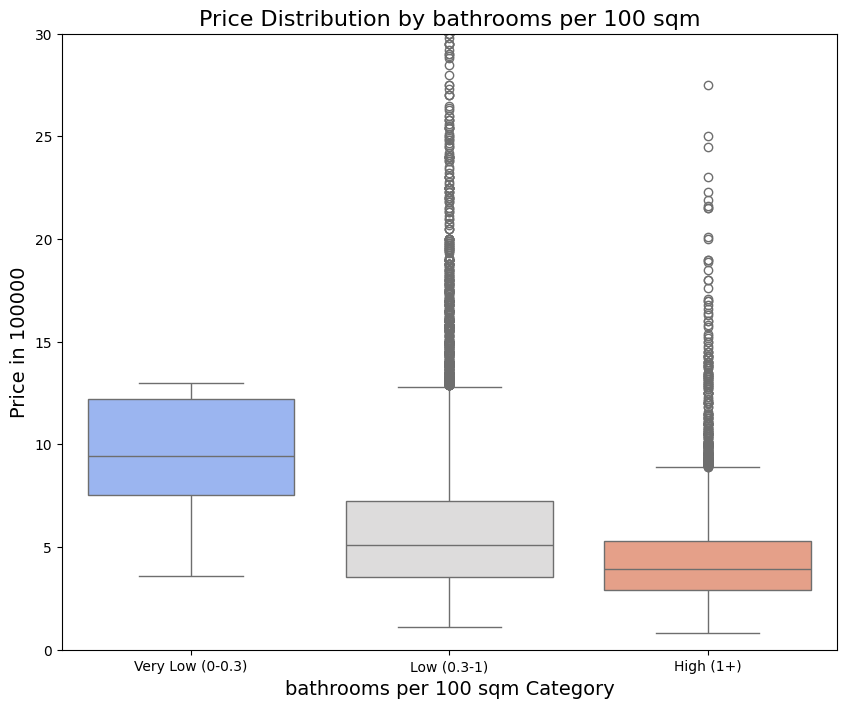

In [22]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='bathrooms_100',  # Binned categories
    y='price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)
 
                                    # Y-axis label



# Adding labels and title
plt.title('Price Distribution by bathrooms per 100 sqm', fontsize=16)  # Title with larger font size
plt.xlabel('bathrooms per 100 sqm Category', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000', fontsize=14)                                       # Y-axis label

plt.ylim(0, 30) 
 
plt.show()  # Display the boxplot

##### Price destribution by bedrooms/bethrooms per 100 sqm  

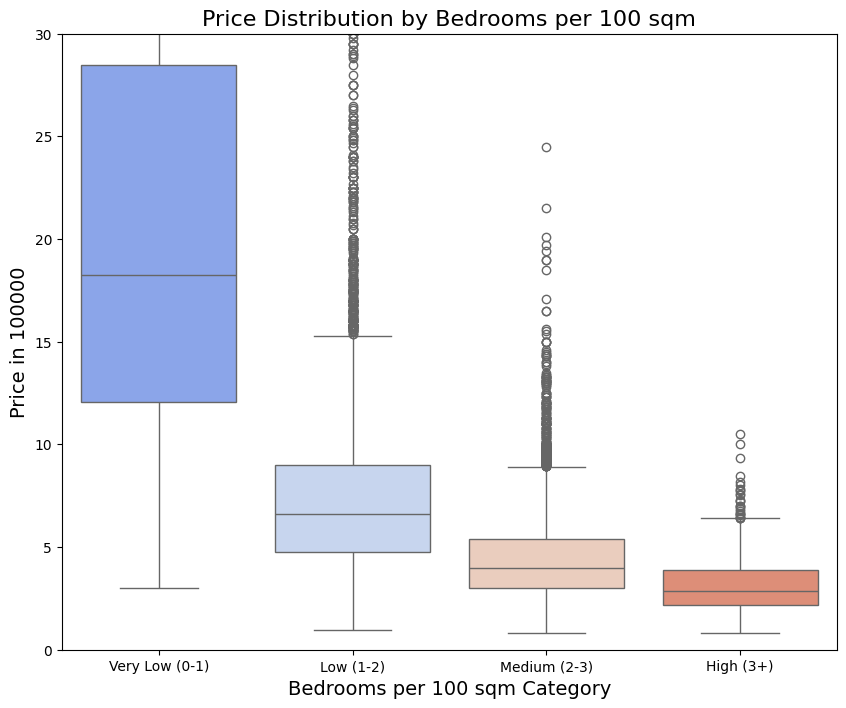

In [24]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='bedrooms_100',  # Binned categories
    y='price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

# Adding labels and title
plt.title('Price Distribution by Bedrooms per 100 sqm', fontsize=16)  # Title with larger font size
plt.xlabel('Bedrooms per 100 sqm Category', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000', fontsize=14)                                       # Y-axis label
plt.ylim(0, 30) 
plt.show()  # Display the boxplot

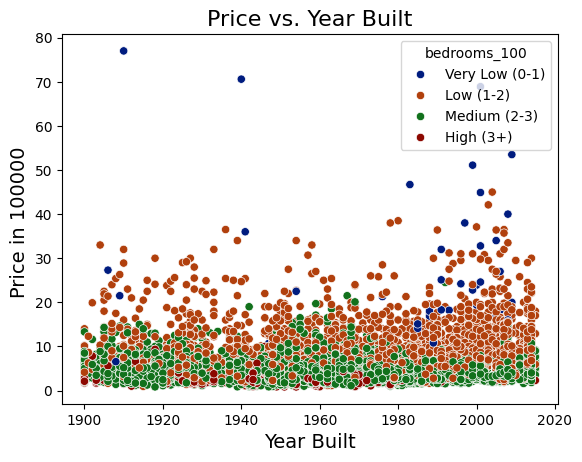

In [65]:

sns.scatterplot(data=df_eda, x='yr_built', y='price', 
                    hue='bedrooms_100', palette='dark')

# Adding labels and title
plt.title('Price vs. Year Built', fontsize=16)  # Title with larger font size
plt.xlabel('Year Built', fontsize=14)  # X-axis label
plt.ylabel('Price in 100000 ', fontsize=14)  # Y-axis label

plt.show() 


##### Correlation between Ratio bedrooms/bathrooms to square meter and price

Text(70.7222222222222, 0.5, 'Features')

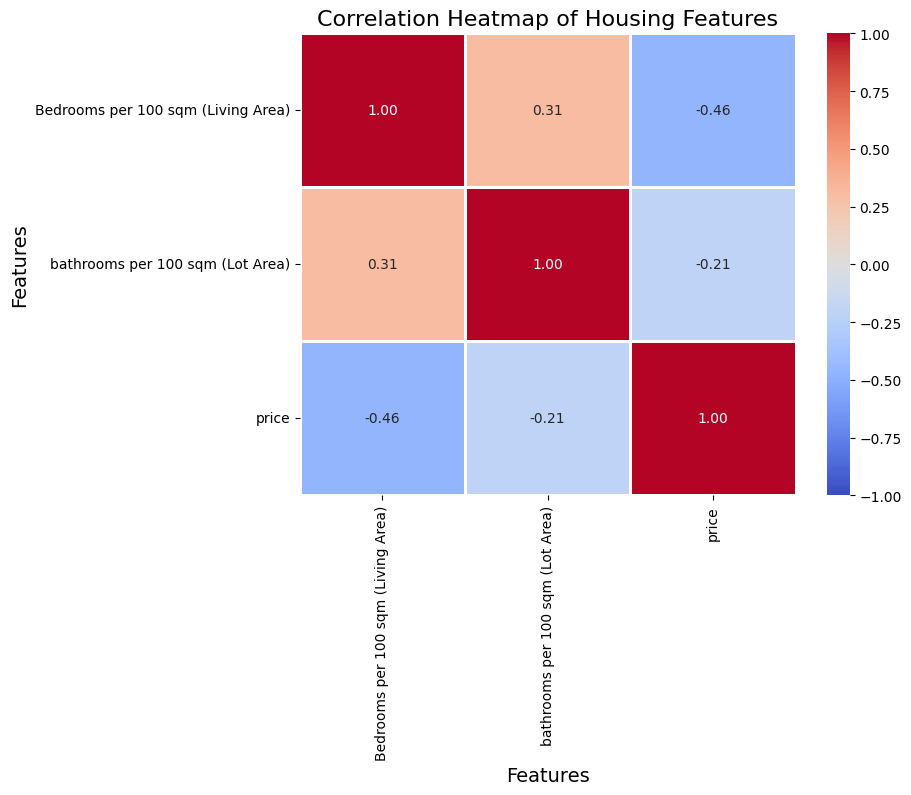

In [68]:
new_column_names = {
    'bedrooms_for_100sqlivmeter': 'Bedrooms per 100 sqm (Living Area)',
    'bathrooms_for_100sqliving': 'bathrooms per 100 sqm (Lot Area)',
    'price': 'price'
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size


#### Save data for next steps

In [67]:
df_eda.to_csv("eda4.csv")
